# Significance Tests
When looking at the modeling we did so far, we saw that some of the important features were categorical. We would like to apply a significance test to see if there are differences in the different groups.

Author: Julia Hammerer, Vanessa Mai 
Last Changes: 09.12.2018

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Significance-Tests" data-toc-modified-id="Significance-Tests-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Significance Tests</a></span><ul class="toc-item"><li><span><a href="#Mann-Whitney-U-Test" data-toc-modified-id="Mann-Whitney-U-Test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mann Whitney U Test</a></span></li><li><span><a href="#TT-Test" data-toc-modified-id="TT-Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>TT-Test</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.insert(0, '../helper/')

In [27]:
# load packages
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
import math
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

One of the important features was the neighborhood, so we are going to take a look at that. We will test one against all other

In [3]:
# load data
df=pd.read_csv("../data/house_prices_train.csv")


In [11]:
neighborhoods

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [6]:
neighborhoods=df.Neighborhood.unique()

## Mann Whitney U Test
Does not necessarily requires a normal distribution

In [16]:
a, b=mannwhitneyu(df[df["Neighborhood"]=="Veenker"]["SalePrice"], df[df["Neighborhood"]!="Veenker"]["SalePrice"])

In [22]:
for i in neighborhoods:
   stat, p = mannwhitneyu(df[df["Neighborhood"]==i]["SalePrice"], df[df["Neighborhood"]!=i]["SalePrice"])
   print(i+ " "+ 'Stat=%.3f, p=%.4f' % (stat, p))


CollgCr Stat=69854.500, p=0.0000
Veenker Stat=3899.000, p=0.0017
Crawfor Stat=24728.000, p=0.0001
NoRidge Stat=4231.500, p=0.0000
Mitchel Stat=29438.000, p=0.0385
Somerst Stat=29995.500, p=0.0000
NWAmes Stat=38043.500, p=0.0002
OldTown Stat=33193.500, p=0.0000
BrkSide Stat=19671.500, p=0.0000
Sawyer Stat=31250.500, p=0.0000
NridgHt Stat=10152.000, p=0.0000
NAmes Stat=94162.500, p=0.0000
SawyerW Stat=35241.500, p=0.0275
IDOTRR Stat=6592.000, p=0.0000
MeadowV Stat=2507.500, p=0.0000
Edwards Stat=32703.000, p=0.0000
Timber Stat=12136.000, p=0.0000
Gilbert Stat=38429.500, p=0.0000
StoneBr Stat=4848.000, p=0.0000
ClearCr Stat=12089.000, p=0.0002
NPkVill Stat=4691.500, p=0.0725
Blmngtn Stat=8421.500, p=0.0131
BrDale Stat=2443.000, p=0.0000
SWISU Stat=12783.000, p=0.0068
Blueste Stat=914.500, p=0.1811


`NPkVill`, `Blmngtn`, `Blueste Stat` seem to be not significantly important. For these attributes we cannot reject the 0-Hypothesis.

## TT-Test

In [24]:
for i in neighborhoods:
   stat, p = ttest_ind(df[df["Neighborhood"]==i]["SalePrice"], df[df["Neighborhood"]!=i]["SalePrice"])
   print(i+ " "+ 'Stat=%.3f, p=%.4f' % (stat, p))


CollgCr Stat=2.780, p=0.0055
Veenker Stat=2.428, p=0.0153
Crawfor Stat=2.724, p=0.0065
NoRidge Stat=13.368, p=0.0000
Mitchel Stat=-2.212, p=0.0271
Somerst Stat=5.401, p=0.0000
NWAmes Stat=0.897, p=0.3699
OldTown Stat=-7.478, p=0.0000
BrkSide Stat=-5.542, p=0.0000
Sawyer Stat=-4.943, p=0.0000
NridgHt Stat=16.771, p=0.0000
NAmes Stat=-7.330, p=0.0000
SawyerW Stat=0.556, p=0.5783
IDOTRR Stat=-6.350, p=0.0000
MeadowV Stat=-4.325, p=0.0000
Edwards Stat=-6.985, p=0.0000
Timber Stat=4.859, p=0.0000
Gilbert Stat=1.373, p=0.1699
StoneBr Stat=8.421, p=0.0000
ClearCr Stat=2.131, p=0.0333
NPkVill Stat=-1.449, p=0.1477
Blmngtn Stat=0.728, p=0.4667
BrDale Stat=-3.888, p=0.0001
SWISU Stat=-2.437, p=0.0149
Blueste Stat=-0.773, p=0.4394


`NWAmes`, `SawyerW`,`Gilbert`, `Blmngtn`  `NPkVill`,  and `Blueste` seem not to be significantly important. 3 of them have also been identified by the Mann Whitney U test. The effect of most of the other attributes are very small though. 
Significant attributes + high effect:
* CollgCr 
* Veenker
* NoRidge 
* Somerst 
* NridgHt 
* Timber 
* StoneBr 
* ClearCr 

Let's have a look at `NridgHt`  in an exemplary way: 

C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



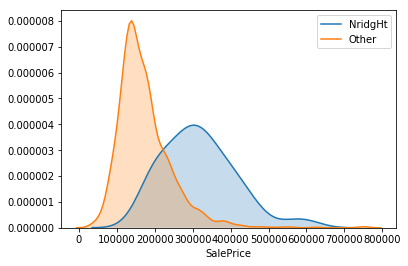

In [25]:
sns.distplot(df.query('Neighborhood == "NridgHt"')['SalePrice'], hist=False, label='NridgHt', kde_kws={"shade": True})
sns.distplot(df.query('Neighborhood != "NridgHt"')['SalePrice'], hist=False, label='Other', kde_kws={"shade": True})


`NridgHt`seem to have more expensive houses. 
Another example with `NoRidge`:

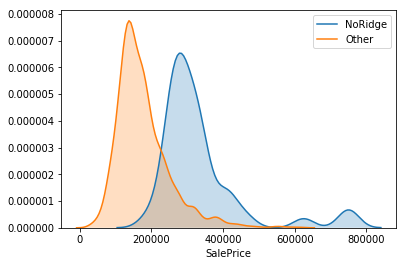

In [26]:
sns.distplot(df.query('Neighborhood == "NoRidge"')['SalePrice'], hist=False, label='NoRidge', kde_kws={"shade": True})
sns.distplot(df.query('Neighborhood != "NoRidge"')['SalePrice'], hist=False, label='Other', kde_kws={"shade": True})


These attributes have also been considered as important in the Lasso Regressions